# Inspect Merged Raw Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)

In [47]:
raw_df = pd.read_csv("../00_data/1_interim/raw_merged_data.csv")
raw_df.info() 
#NOTES:
# 13 columns x 13038 rows
# Only child_mortality_igme column, with Entity, Code & Year are entirely complete
# Data Types are already correct for all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13038 entries, 0 to 13037
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    13038 non-null  object 
 1   Code                                      13038 non-null  object 
 2   Year                                      13038 non-null  int64  
 3   child_mortality_igme                      13038 non-null  float64
 4   annual_healthcare_expenditure_per_capita  4357 non-null   float64
 5   gdp_per_capita_worldbank                  6299 non-null   float64
 6   nurses_and_midwives_per_1000_people       3109 non-null   float64
 7   physicians_per_1000_people                4986 non-null   float64
 8   prevalence_of_undernourishment            3661 non-null   float64
 9   share_of_population_urban                 11580 non-null  float64
 10  share_without_improved_water      

In [3]:
# Count unqiue count of years and countries
years = np.sort(raw_df["Year"].unique())
countries = np.sort(raw_df["Entity"].unique())
print(f"The years go from {years[0]} to {years[len(years)-1]}.")
print(f"There are {len(countries)} countries in total.")

The years go from 1932 to 2023.
There are 200 countries in total.


In [4]:
raw_df.describe()

,Year,child_mortality_igme,annual_healthcare_expenditure_per_capita,gdp_per_capita_worldbank,nurses_and_midwives_per_1000_people,physicians_per_1000_people,prevalence_of_undernourishment,share_of_population_urban,share_without_improved_water,vaccination_coverage_who_unicef,years_of_schooling
count,13038.000000,13038.000000,4357.000000,6299.000000,3109.000000,4986.000000,3661.000000,11580.000000,4433.000000,7897.000000,5931.000000
mean,1989.722197,8.165227,1229.536521,19930.332431,5.052024,1.727759,11.191150,50.208401,10.675037,80.228948,7.474125
std,20.581174,8.635293,1639.306894,22422.920563,4.139184,1.455818,11.362064,24.538464,14.193934,21.777817,3.602379
min,1932.000000,0.142931,6.105641,510.822800,0.048000,0.004000,2.500000,2.233000,0.000000,1.000000,0.091810
25%,1974.000000,1.786067,166.867430,4130.386000,1.565000,0.382500,2.500000,29.848750,0.571503,72.000000,4.499609
50%,1991.000000,4.686311,561.126000,11584.285000,4.347000,1.442000,6.300000,49.751000,3.852287,89.000000,7.905000
75%,2007.000000,11.881369,1576.839700,27792.990500,7.226000,2.800750,16.000000,70.036000,16.399597,96.000000,10.481000
max,2023.000000,76.738420,12434.434000,145591.020000,27.060000,9.429000,71.400000,100.000000,74.501884,99.000000,14.140000


### How often do countries appear

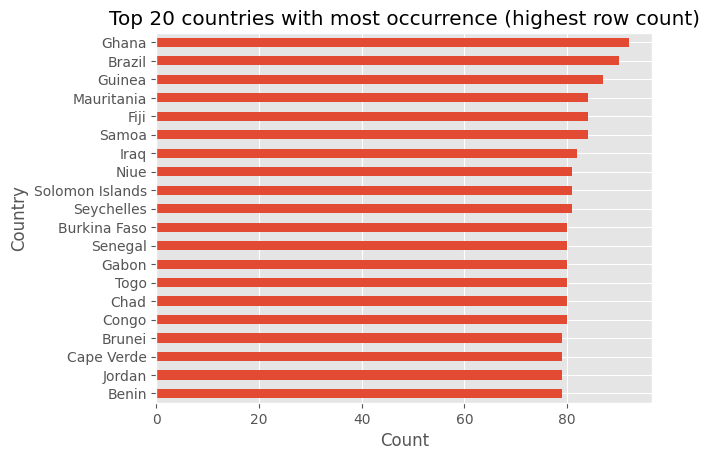

In [46]:
def plot_countries_count(df, mode, num, title):
    count_per_country = df["Entity"].value_counts().reset_index()
    count_per_country.columns = ["Entity", "Count"]
    if mode.lower() == "head":
        count_per_country.head(num).sort_values(by="Count", ascending=True).plot(kind="barh", x="Entity", y="Count", legend=False)
    elif mode.lower() == "tail":
        count_per_country.tail(num).sort_values(by="Count", ascending=True).plot(kind="barh", x="Entity", y="Count", legend=False)
    plt.xlabel("Count")
    plt.ylabel("Country")
    plt.title(title)
    plt.show()

plot_countries_count(raw_df, "head", 20, "Top 20 countries with most occurrence (highest row count)")
#NOTE:
# around 80 years covered for the top 20 countries --> 

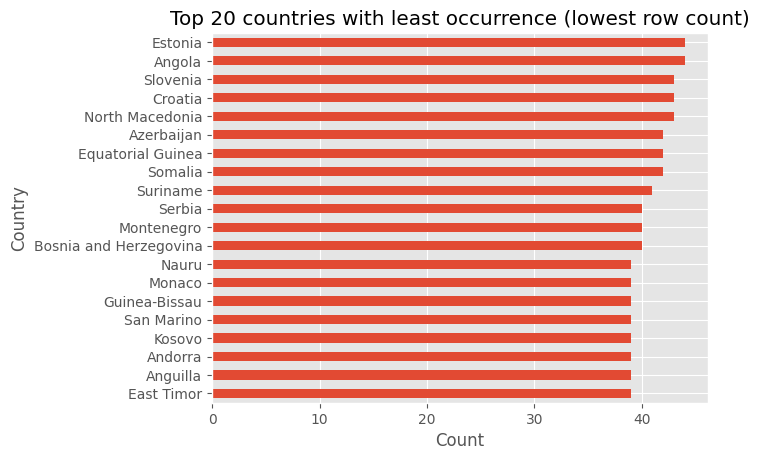

In [6]:
plot_countries_count(raw_df, "tail", 20, "Top 20 countries with least occurrence (lowest row count)")
#NOTE:
# countries with least occurence still have around 40 rows 
# To limit the scope for this project it would be best to have same amount of rows for each country, more recent years rather (21 century)

### Which countries have the most missing values?

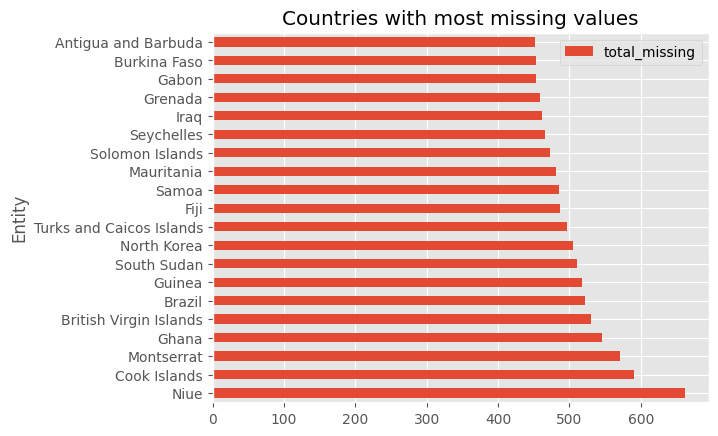

In [7]:
df_nans = raw_df.groupby(["Entity"]).apply(lambda x: x.isna().sum(), include_groups=False)
total_missing_country = df_nans.sum(axis=1)
total_missing_country = total_missing_country.reset_index()
total_missing_country.columns = ["Entity", "total_missing"]
top_10_missing = total_missing_country.sort_values(by="total_missing", ascending=False)

top_10_missing.head(20).plot(kind="barh", x="Entity")
plt.title("Countries with most missing values")
plt.show()
# NOTE:
# Ghana, Brazil, Guinea e.g. has most rows, so relatively higher NaNs than countries with less total rows
# e.g. Ghana starts alreay at 1932 (no data until 1959)

### Inspect Missing Values

In [60]:
# Count missing values per column
def missing_values_count(df):
    print(f"Prozentual Missing Values:\n\n{round(df.isna().sum() / len(df) * 100, 2)}\n\nAbsolut Missing Values:\n\n{df.isna().sum()} ")

missing_values_count(raw_df)

Prozentual Missing Values:

Entity                                       0.00
Code                                         0.00
Year                                         0.00
child_mortality_igme                         0.00
annual_healthcare_expenditure_per_capita    66.58
gdp_per_capita_worldbank                    51.69
nurses_and_midwives_per_1000_people         76.15
physicians_per_1000_people                  61.76
prevalence_of_undernourishment              71.92
share_of_population_urban                   11.18
share_without_improved_water                66.00
vaccination_coverage_who_unicef             39.43
years_of_schooling                          54.51
dtype: float64

Absolut Missing Values:

Entity                                         0
Code                                           0
Year                                           0
child_mortality_igme                           0
annual_healthcare_expenditure_per_capita    8681
gdp_per_capita_worldbank            

#### Count of Missing Values vs Occurence Count of Each Year

In [28]:
# get total missing count + how often a frequency of each Year
missing_share_years = raw_df.copy()
cols_factors = missing_share_years.columns.drop(['Year', 'Entity', 'Code', 'child_mortality_igme'])
missing_share_years["missing_per_row"] = missing_share_years[cols_factors].isna().sum(axis=1)

infos_per_year = missing_share_years.groupby("Year").agg(total_missing=("missing_per_row", "sum"), frequency=("missing_per_row", "size")).reset_index()

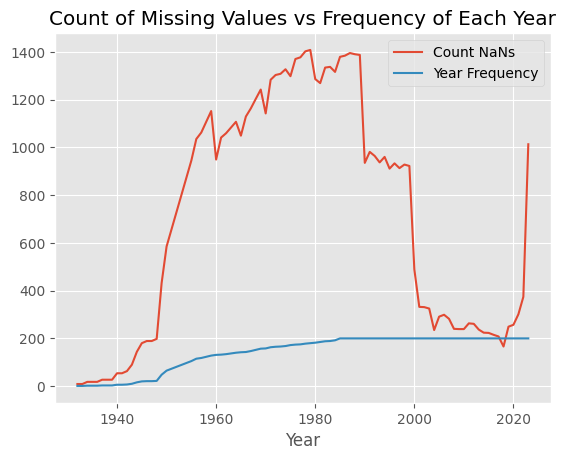

In [49]:
#Lineplots
ax = sns.lineplot(data=infos_per_year, y="total_missing", x="Year", label="Count NaNs")
ax = sns.lineplot(data=infos_per_year, y="frequency", x="Year", label="Year Frequency")

plt.ylabel("")
ax.set_title("Count of Missing Values vs Frequency of Each Year")
plt.show()
#NOTE:
# 2000s lowest amount of NaNs event though highest frequency (200) 
# compared to older years with less frequency & higher amount of NaNs

#### Missing Values Matrix per Variable

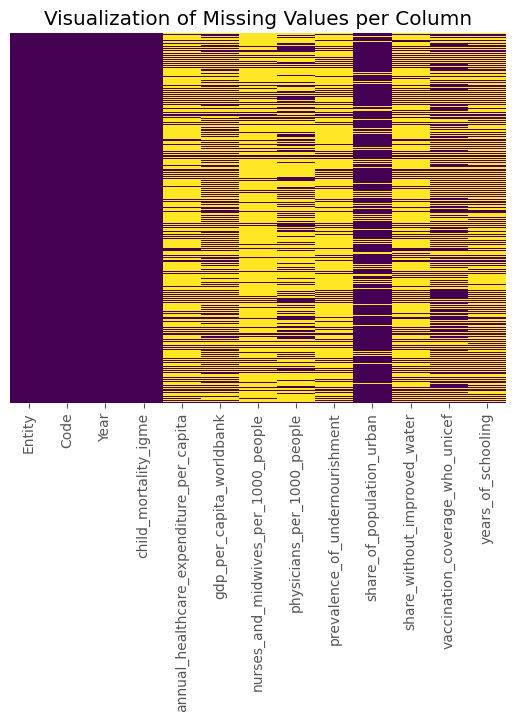

In [11]:
sns.heatmap(raw_df.isna(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Visualization of Missing Values per Column")
plt.show()
#NOTES:
# purple = not missing, yellow = missing
# Entity, Code, Year and child_mortality complete
# share_of_population_urban mostly non-nulls, other columns have a lot

# viele gelbe "horizontale Streifen" entlang der 9 Einflussfaktoren columns (könnte Indiz für Missing At Random sein)
# zB wenn Faktor A fehlt, fehlt auch Faktor B (oft vorkommend für Niedrigeinkommensländer)

# share_of_population_urban ist kein kritischer Indikator, 
# andere schon (viele Länder haben zb kaum Ressourcen, schwierige politische Lage etc. schlechte Ausgangslage = weniger gute Registersysteme)
# --> mit Quellen belegen

#### Missing Values Matrix per Year

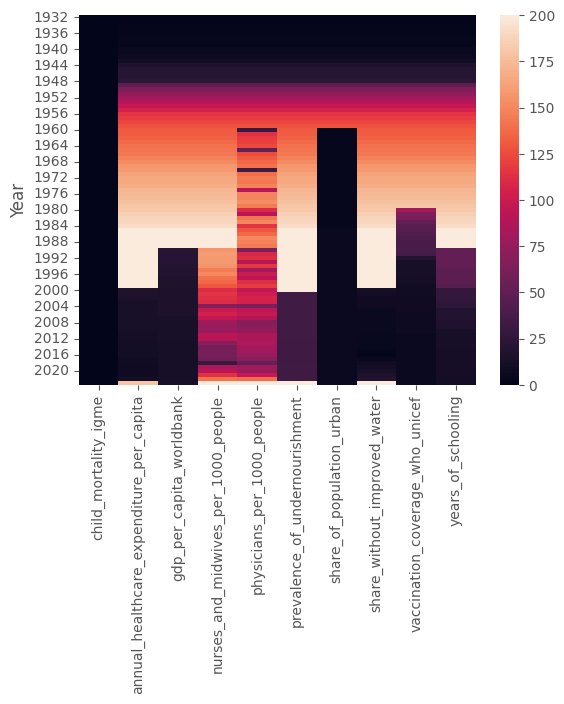

In [12]:
sort_years = raw_df.isna().groupby(raw_df["Year"]).sum()
sort_years = sort_years.drop(columns=["Entity", "Year", "Code"])
#plt.figure(figsize=(10, 16))
sns.heatmap(sort_years, yticklabels=4)
plt.show()
# NOTE:
#years in the 30s seem to be top years with least NaN values
#BUT!!!: cause they appear only one time / few times unlike current years (see next plot below)

#### Count Occurrence of each Year (total)

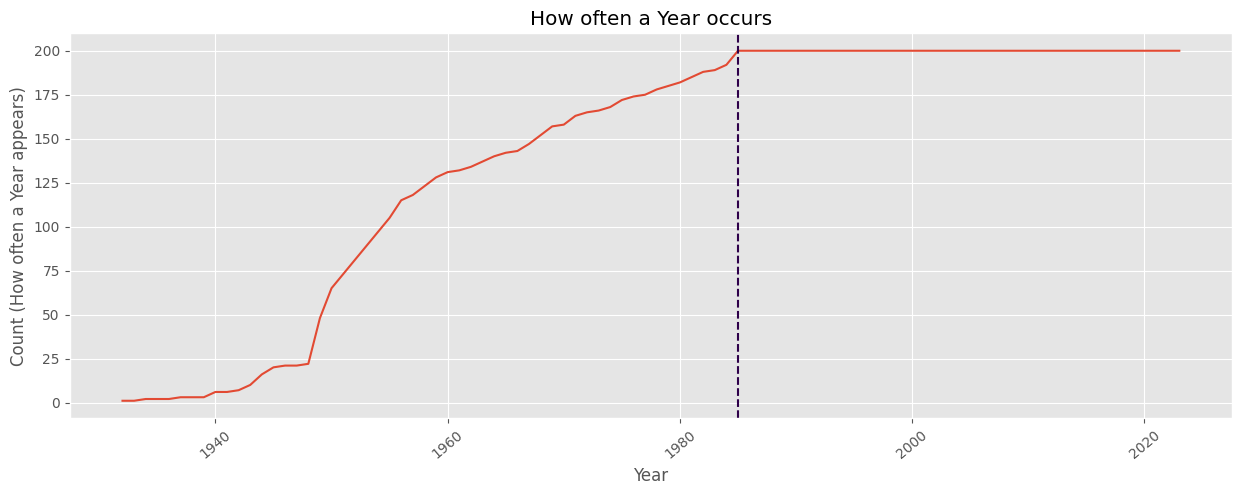

In [13]:
years_count = raw_df["Year"].value_counts().sort_values()
years_count = years_count.reset_index()
#years_count
plt.figure(figsize=(15,5))
plt.xticks(rotation=40)
ax = sns.lineplot(data=years_count, x="Year", y="count")
plt.axvline(x=1985, color="#2e004a", linestyle="--")
plt.ylabel("Count (How often a Year appears)")
plt.title("How often a Year occurs")
plt.show()

#NOTE: 
# TOTAL raw_df has 200 countries 
# from 1985 til 2023, all 200 countries are available

#### Number of occurrences for each Year

In [29]:
print("How much a certain Year occurs = how many countries have data for this year")
years_count.sort_values(by='Year').head()

How much a certain Year occurs = how many countries have data for this year


,Year,count
0,1932,1
1,1933,1
2,1934,2
4,1935,2
3,1936,2


### Investigate Data from 1985 forwards

In [15]:
#NOTE:
# best to limit dataset to a certain period, with all 200 countries represented equally
# thats why: eliminate all rows with older years (from 1932 to 1984)

limited_df = raw_df.copy()
limited_df = limited_df[(limited_df["Year"]>= 1985)].reset_index(drop=True)

In [61]:
missing_values_count(limited_df)

Prozentual Missing Values:

Entity                                       0.00
Code                                         0.00
Year                                         0.00
child_mortality_igme                         0.00
annual_healthcare_expenditure_per_capita    44.14
gdp_per_capita_worldbank                    19.24
nurses_and_midwives_per_1000_people         60.14
physicians_per_1000_people                  49.62
prevalence_of_undernourishment              53.06
share_of_population_urban                    2.50
share_without_improved_water                43.17
vaccination_coverage_who_unicef              6.88
years_of_schooling                          23.96
dtype: float64

Absolut Missing Values:

Entity                                         0
Code                                           0
Year                                           0
child_mortality_igme                           0
annual_healthcare_expenditure_per_capita    3443
gdp_per_capita_worldbank            

#### Countries with most missing values

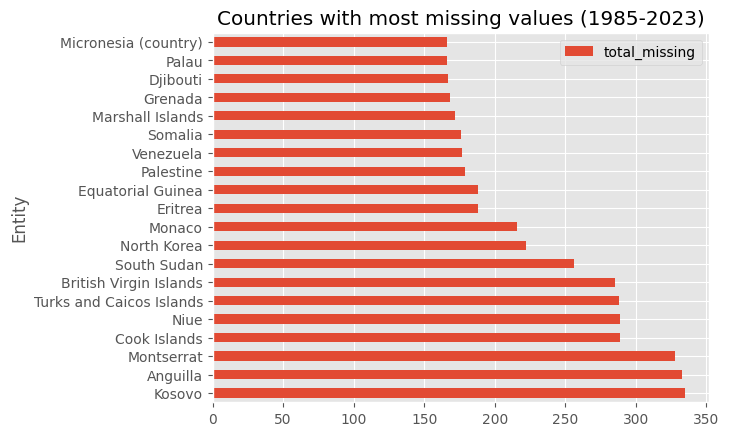

In [17]:
df_nans = limited_df.groupby("Entity").apply(lambda x: x.isna().sum(), include_groups=False)
total_missing_country = df_nans.sum(axis=1)
total_missing_country = total_missing_country.reset_index()
total_missing_country.columns = ["Entity", "total_missing"]
top_10_missing = total_missing_country.sort_values(by="total_missing", ascending=False)

top_10_missing.head(20).plot(kind="barh", x="Entity")
plt.title("Countries with most missing values (1985-2023)")
plt.show()

# NOTE:
#small islands /island states with most missing values

#### Years with most missing values per variable

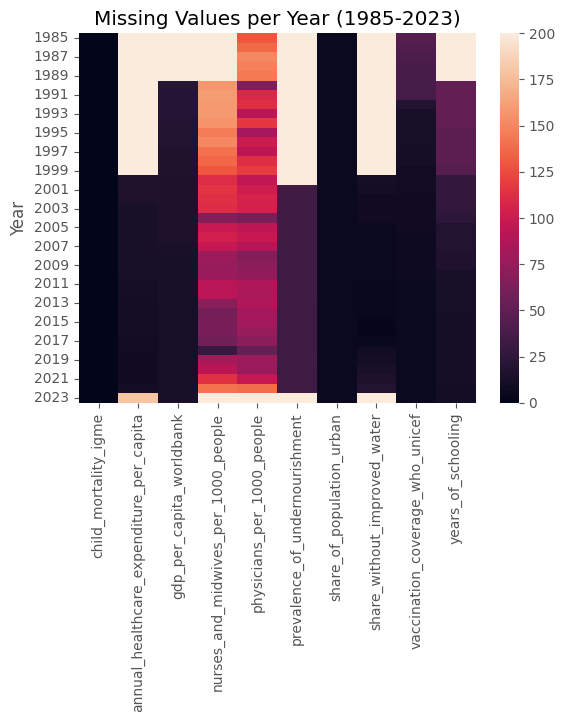

In [18]:
def missingness_per_year(df, ticks, title):
    sort_years_limited = df.isna().groupby(df["Year"]).sum()
    sort_years_limited = sort_years_limited.drop(columns=["Entity", "Year", "Code"])
    sns.heatmap(sort_years_limited, yticklabels=ticks)
    plt.title(title)
    plt.show()

missingness_per_year(limited_df, 2, "Missing Values per Year (1985-2023)")
#NOTE:
# lightbeige = 200 missing values, darkviolet = 0 missing values
# until 2000, there are many columns with almost 200 missing values = for all countries
# from 2000 forwards the amount of missing values is smaller for some columns, other still have around 20-80 Nans
# from 2000 (START of MDG goals): data quality improved, statistic monitoring & better data collections for many countries
# even for 2022-2023 alotof missing

#### Comparison: Missingness Matrix from 1985 forwards

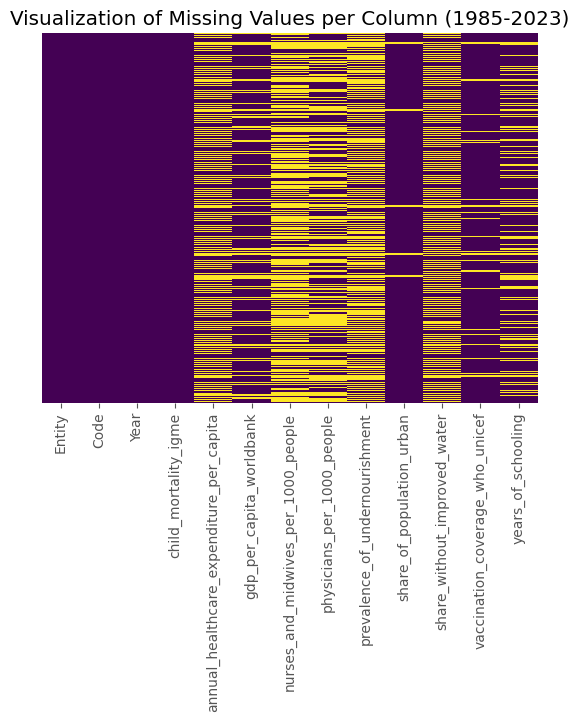

In [19]:
sns.heatmap(limited_df.isna(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Visualization of Missing Values per Column (1985-2023)")
plt.show()

# NOTE:
# purple = not missing, yellow = missing
# less thick yellow "rects" 

### Limit dataframe #2: 2000 forwards

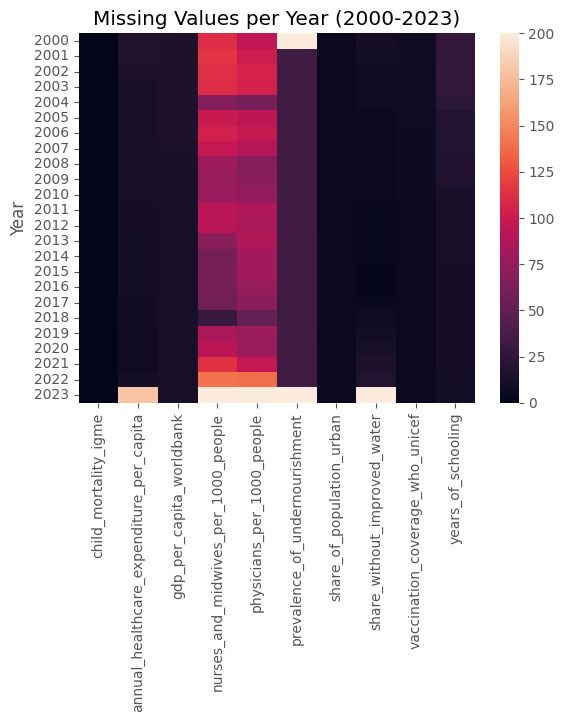

Prozentual Missing Values:

Entity                                       0.00
Code                                         0.00
Year                                         0.00
child_mortality_igme                         0.00
annual_healthcare_expenditure_per_capita     9.23
gdp_per_capita_worldbank                     6.60
nurses_and_midwives_per_1000_people         45.85
physicians_per_1000_people                  45.12
prevalence_of_undernourishment              23.73
share_of_population_urban                    2.50
share_without_improved_water                 7.65
vaccination_coverage_who_unicef              3.40
years_of_schooling                           7.85
dtype: float64

Absolut Missing Values:

Entity                                         0
Code                                           0
Year                                           0
child_mortality_igme                           0
annual_healthcare_expenditure_per_capita     443
gdp_per_capita_worldbank            

In [62]:
limited_df_2000 = limited_df.copy()
limited_df_2000 = limited_df_2000[(limited_df_2000["Year"]>= 2000)].reset_index(drop=True)

missingness_per_year(limited_df_2000, 1, "Missing Values per Year (2000-2023)")

missing_values_count(limited_df_2000)

# NOTE:
#for early 2000 & 2022/23 most missing values
# 2 variables nurses_midwives & physicians "middle-ground", around 50-125 Nans

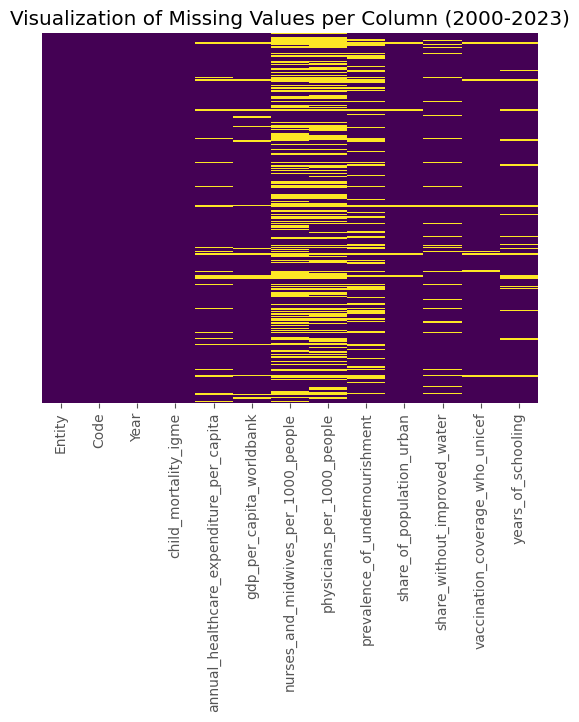

In [21]:
sns.heatmap(limited_df_2000.isna(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Visualization of Missing Values per Column (2000-2023)")
plt.show()

#### Missing Values per Year (2000-2023)

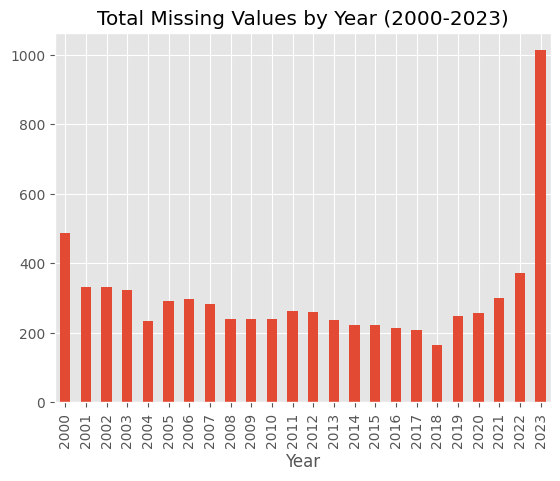

In [22]:
limited_df_2000["total_missing"] = limited_df_2000.isna().sum(axis=1)
nans_by_year = limited_df_2000.groupby("Year")["total_missing"].sum()
nans_by_year.plot(kind='bar')
plt.title("Total Missing Values by Year (2000-2023)")
plt.show()

In [23]:
missing_per_year = nans_by_year.reset_index()
missing_per_year["total_missing_%"] = missing_per_year["total_missing"] / len(limited_df_2000) * 100
missing_per_year
# least missing values for consecutive years are in the start/mid of 2010s

,Year,total_missing,total_missing_%
0,2000,489,10.187500
1,2001,332,6.916667
2,2002,331,6.895833
3,2003,325,6.770833
4,2004,235,4.895833
5,2005,291,6.062500
6,2006,299,6.229167
7,2007,282,5.875000
8,2008,240,5.000000
9,2009,239,4.979167


In [56]:
# print coun of missing values for specific year-periods
def get_years_period(df, period):
    nulls_list = []
    null_count = 0
    year_idx = df["Year"]
    
    print(f"{period}-year period:\n")
    for begin in range(2000, year_idx.max() - (period - 2)):
        end = begin + (period - 1)
        df_six_years = df[(year_idx >= begin) & (year_idx <= end)]
        null_count = df_six_years.isna().sum().sum()
        nulls_list.append((begin, end, null_count)) #list of tuple (begin, end, null_values count)
        print(f"From {begin} - {end}, NaN values count: {null_count}")

get_years_period(limited_df_2000, 6)

#NOTE:
# To have a appropriate amount of rows but still limited period per country, check periods >= 6
# for 6-year period: 2013 - 2018 least NaN values

6-year period:

From 2000 - 2005, NaN values count: 2003
From 2001 - 2006, NaN values count: 1813
From 2002 - 2007, NaN values count: 1763
From 2003 - 2008, NaN values count: 1672
From 2004 - 2009, NaN values count: 1586
From 2005 - 2010, NaN values count: 1590
From 2006 - 2011, NaN values count: 1562
From 2007 - 2012, NaN values count: 1524
From 2008 - 2013, NaN values count: 1479
From 2009 - 2014, NaN values count: 1463
From 2010 - 2015, NaN values count: 1447
From 2011 - 2016, NaN values count: 1423
From 2012 - 2017, NaN values count: 1368
From 2013 - 2018, NaN values count: 1273
From 2014 - 2019, NaN values count: 1285
From 2015 - 2020, NaN values count: 1318
From 2016 - 2021, NaN values count: 1396
From 2017 - 2022, NaN values count: 1555
From 2018 - 2023, NaN values count: 2360


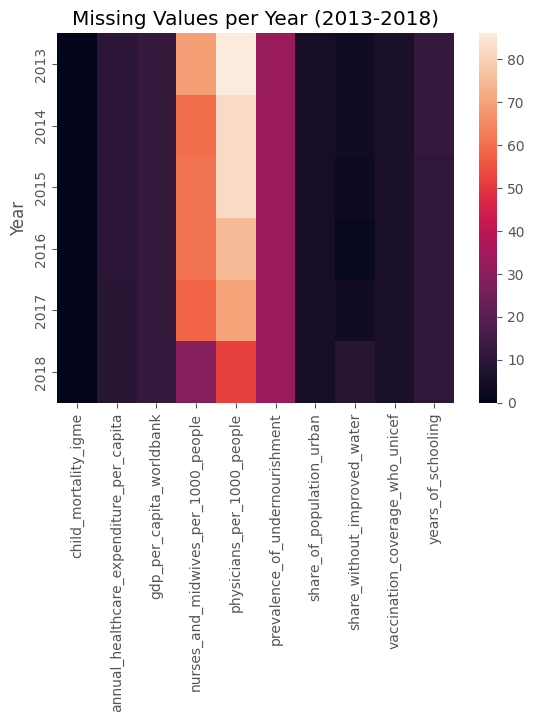

Prozentual Missing Values:

Entity                                       0.00
Code                                         0.00
Year                                         0.00
child_mortality_igme                         0.00
annual_healthcare_expenditure_per_capita     4.83
gdp_per_capita_worldbank                     6.00
nurses_and_midwives_per_1000_people         28.17
physicians_per_1000_people                  37.25
prevalence_of_undernourishment              16.50
share_of_population_urban                    2.50
share_without_improved_water                 2.17
vaccination_coverage_who_unicef              3.00
years_of_schooling                           5.67
dtype: float64

Absolut Missing Values:

Entity                                        0
Code                                          0
Year                                          0
child_mortality_igme                          0
annual_healthcare_expenditure_per_capita     58
gdp_per_capita_worldbank                 

In [63]:
df_2013_2018 = raw_df.copy()
df_2013_2018 = df_2013_2018[(df_2013_2018["Year"] >= 2013) & (df_2013_2018["Year"] <= 2018)].reset_index(drop=True)

missingness_per_year(df_2013_2018, 1, "Missing Values per Year (2013-2018)")

missing_values_count(df_2013_2018)

#### -

In [25]:
countries_u5mr = limited_df.copy()
countries_u5mr = countries_u5mr.pivot(index="Year", columns="Entity", values="child_mortality_igme")
#sns.lineplot(data=top_5_U5MR, x="Entity", y="Avg_U5MR")

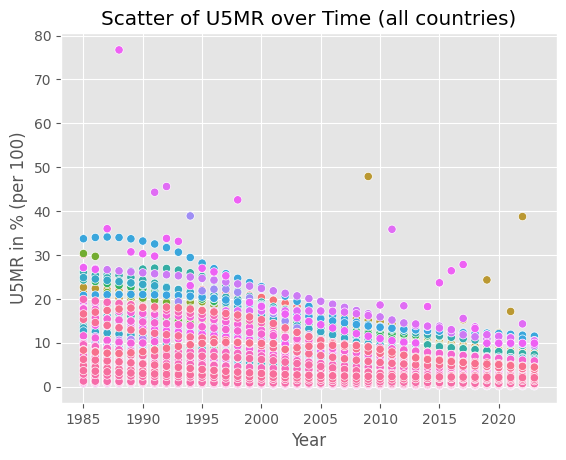

In [26]:
sns.scatterplot(data=limited_df, x="Year", y="child_mortality_igme", hue="Entity", legend=False)
plt.title("Scatter of U5MR over Time (all countries)")
plt.ylabel("U5MR in % (per 100)")
plt.show()